In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\nyoja\AppData\Local\Temp\ipykernel_4724\2782219258.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv(r"D:\major project\Smart-Building-Maintenance-Prediction--main\Modified_Dataset\722.csv")

Basic Information About the Dataset:

In [3]:
data.shape

(275890, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275890 entries, 0 to 275889
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           275890 non-null  int64  
 1   co2          275890 non-null  float64
 2   humidity     275889 non-null  float64
 3   light        275889 non-null  float64
 4   pir          275888 non-null  float64
 5   temperature  275889 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 12.6 MB


In [5]:
data.head()

,id,co2,humidity,light,pir,temperature
0,1377299094,366.0,NaN,NaN,NaN,NaN
1,1377299103,366.0,48.94,3.0,NaN,23.11
2,1377299125,365.0,48.94,3.0,0.0,23.11
3,1377299126,365.0,48.90,4.0,0.0,23.11
4,1377299130,367.0,48.90,4.0,0.0,23.11


In [6]:
data.tail()

,id,co2,humidity,light,pir,temperature
275885,1378018692,314.0,54.73,5.0,0.0,22.62
275886,1378018702,314.0,54.73,5.0,0.0,22.62
275887,1378018712,314.0,54.73,5.0,0.0,22.62
275888,1378018722,314.0,54.73,5.0,0.0,22.62
275889,1378018732,314.0,54.73,5.0,0.0,22.62


In [7]:
data.describe()

,id,co2,humidity,light,pir,temperature
count,2.758900e+05,275890.000000,275889.000000,275889.000000,275888.000000,275889.000000
mean,1.377668e+09,352.186005,54.388502,5.218602,0.621143,22.845951
std,1.941031e+05,60.033655,2.129753,7.574519,4.102601,0.238951
min,1.377299e+09,291.000000,48.840000,0.000000,0.000000,22.380000
25%,1.377509e+09,320.000000,53.410000,3.000000,0.000000,22.700000
50%,1.377683e+09,331.000000,54.730000,4.000000,0.000000,22.800000
75%,1.377834e+09,352.000000,56.140000,4.000000,0.000000,22.960000
max,1.378019e+09,809.000000,57.350000,51.000000,30.000000,24.150000


In [8]:
total_data = len(data)
print("Total data:",total_data)

Total data: 275890


Finding Null Values in Each Column 

In [9]:
data.isnull().values.any()

True

In [10]:
data.describe().iloc[0]

id             275890.0
co2            275890.0
humidity       275889.0
light          275889.0
pir            275888.0
temperature    275889.0
Name: count, dtype: float64

In [11]:
data.isnull().sum()

id             0
co2            0
humidity       1
light          1
pir            2
temperature    1
dtype: int64

Removing Null Values from the Dataset

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

id             0
co2            0
humidity       0
light          0
pir            0
temperature    0
dtype: int64

In [14]:
new_total_data = len(data)
print("Total data after removing null data:", new_total_data)

Total data after removing null data: 275888


In [15]:
removed_data = total_data - new_total_data
print("Removed data:", removed_data)

Removed data: 2


In [16]:
data.dtypes

id               int64
co2            float64
humidity       float64
light          float64
pir            float64
temperature    float64
dtype: object

EDA on Individual Columns the Dataset

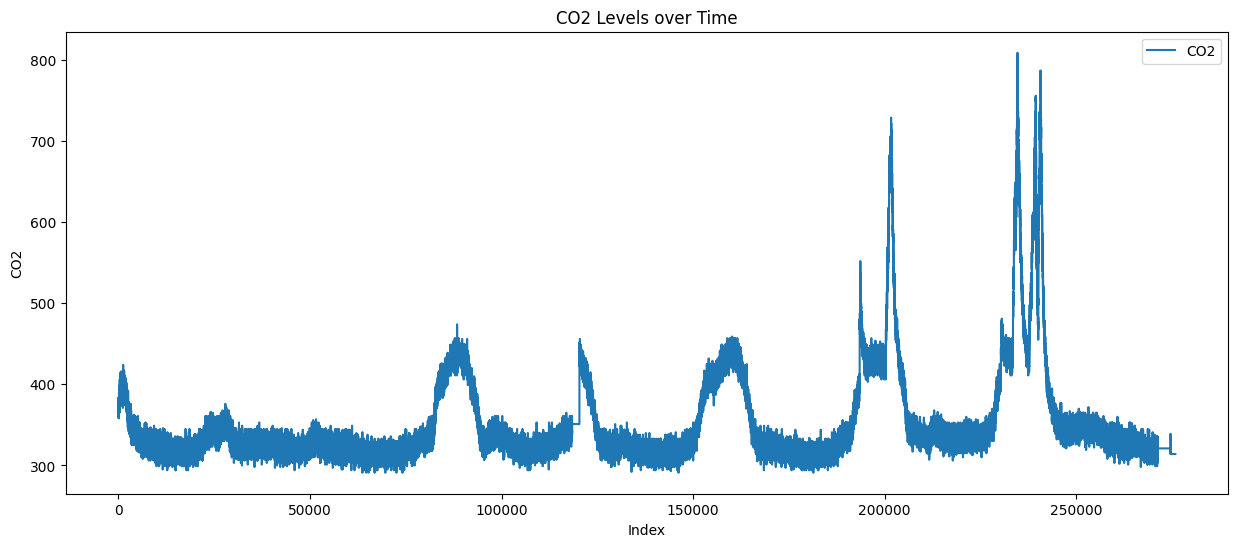

In [17]:
# Line graph
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['co2'], label='CO2')
plt.xlabel('Index')
plt.ylabel('CO2')
plt.title('CO2 Levels over Time')
plt.legend()
plt.show()

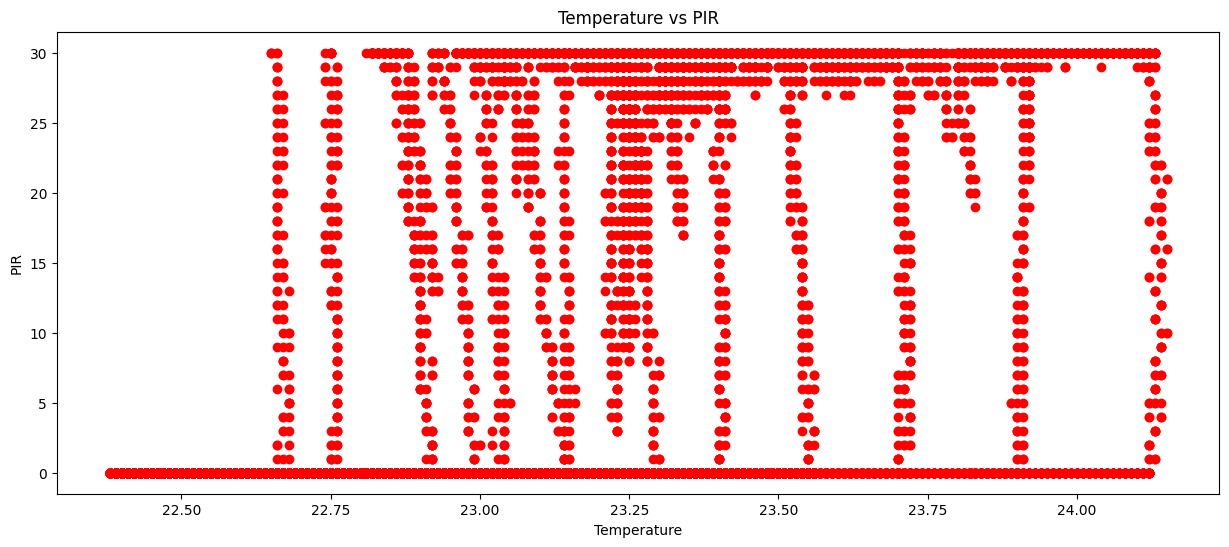

In [18]:
# Scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(data['temperature'], data['pir'], color='red')
plt.xlabel('Temperature')
plt.ylabel('PIR')
plt.title('Temperature vs PIR')
plt.show()

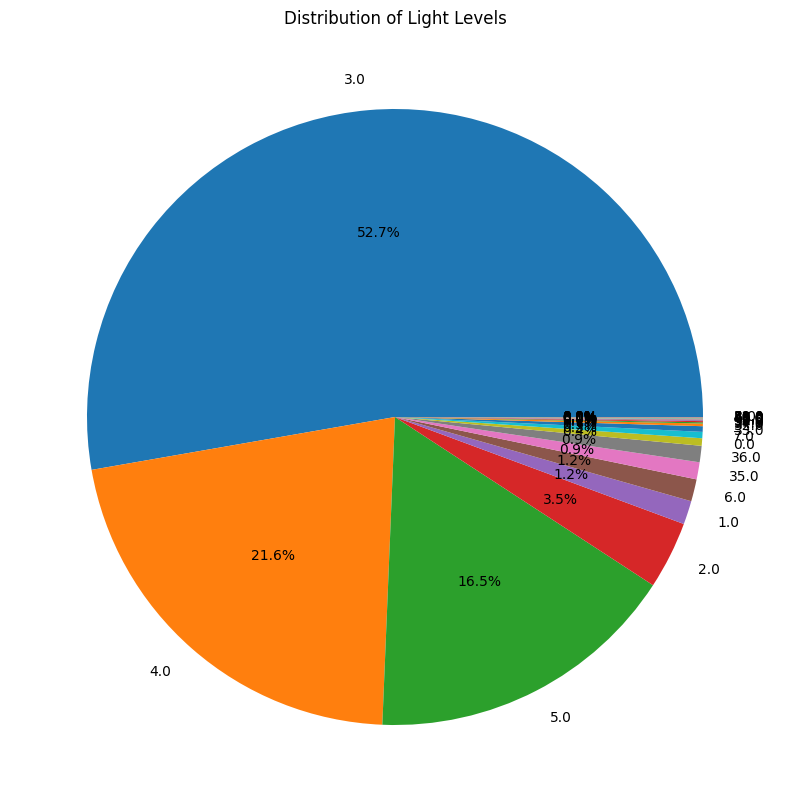

In [19]:
# Pie chart
plt.figure(figsize=(15, 10))
plt.pie(data['light'].value_counts(), labels=data['light'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Light Levels')
plt.show()

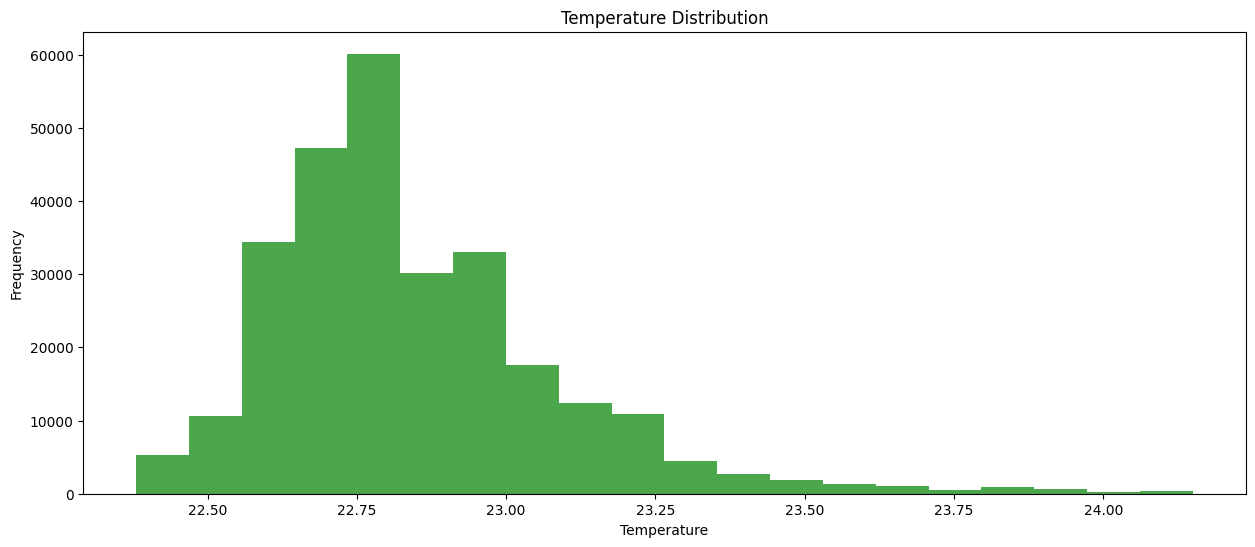

In [20]:
# Histogram
plt.figure(figsize=(15, 6))
plt.hist(data['temperature'], bins=20, color='green', alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()


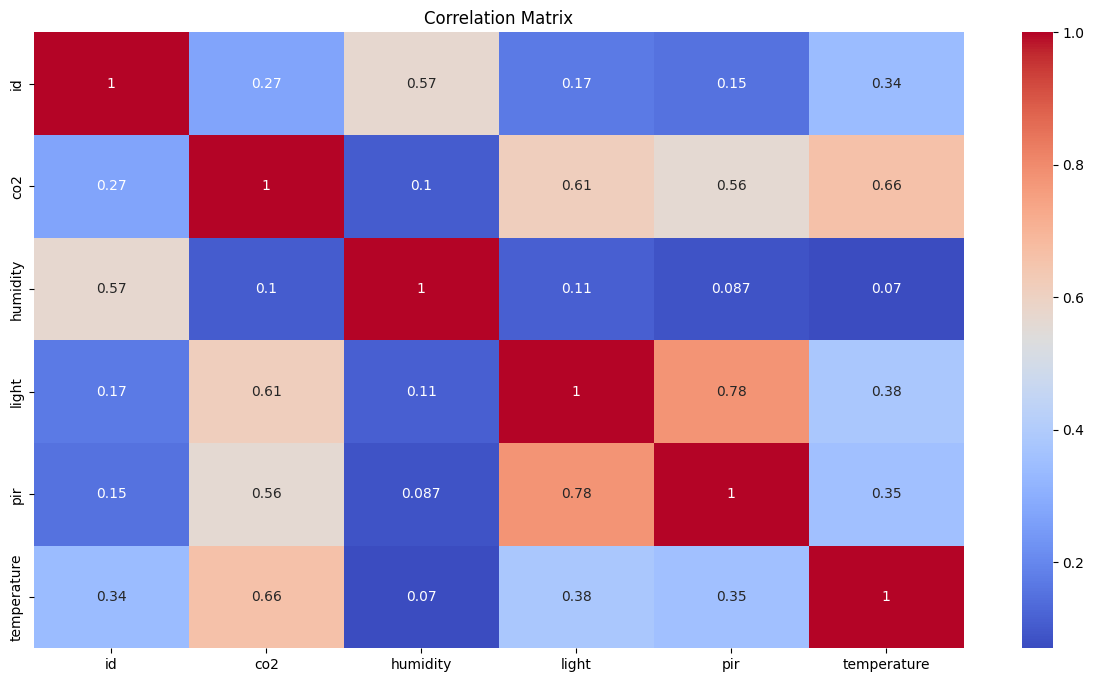

In [21]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

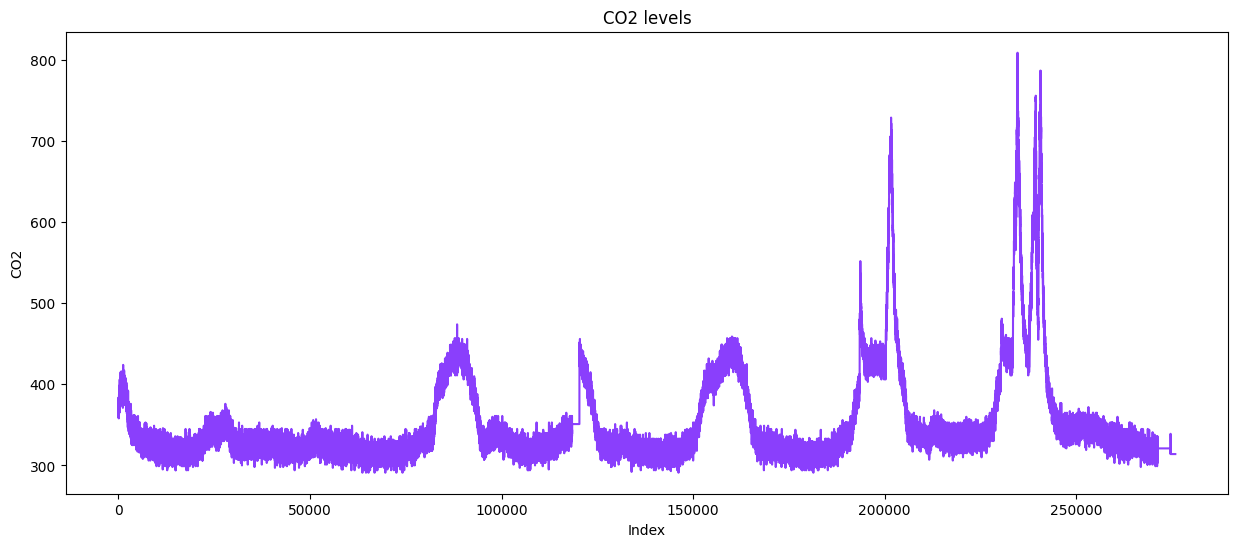

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['co2'], label='CO2', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('CO2')
plt.title('CO2 levels')
plt.show()

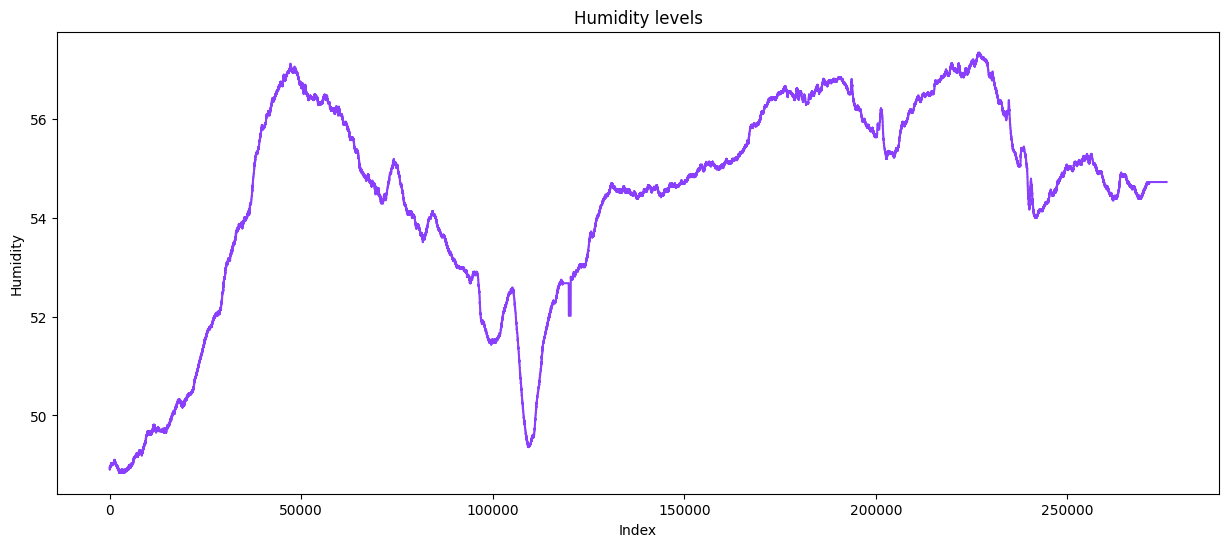

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['humidity'], label='CO2', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Humidity')
plt.title('Humidity levels')
plt.show()

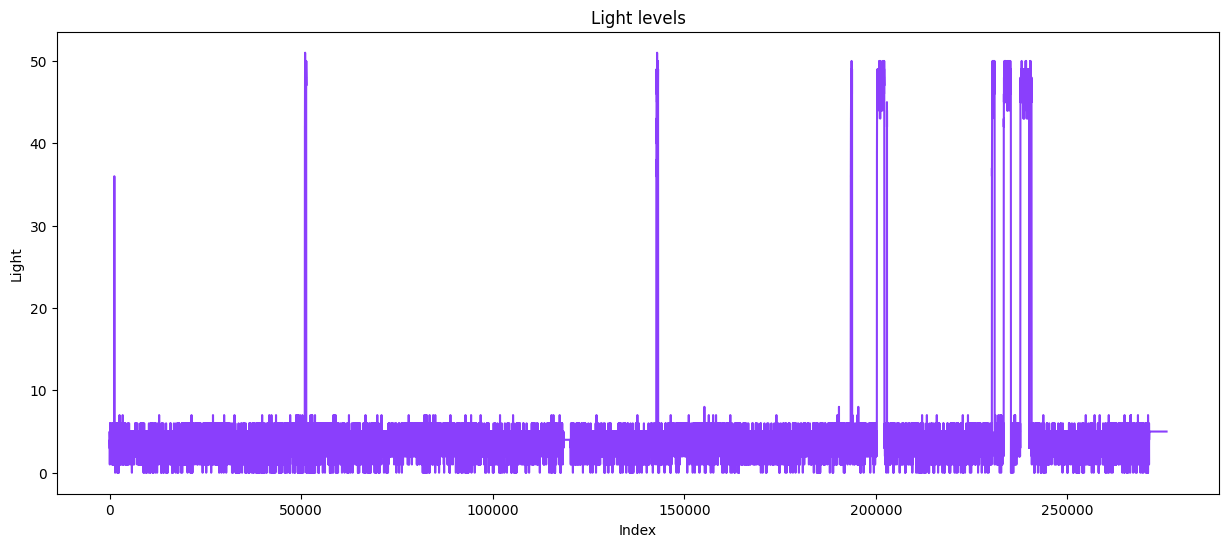

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['light'], label='Light', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Light')
plt.title('Light levels')
plt.show()

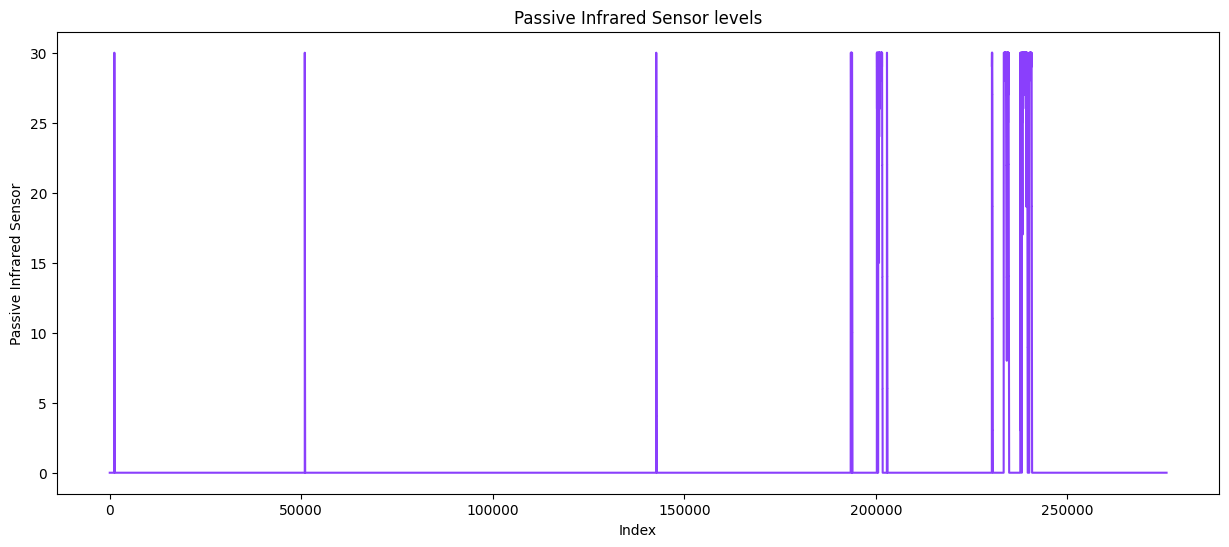

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['pir'], label='Passive Infrared Sensor', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Passive Infrared Sensor')
plt.title('Passive Infrared Sensor levels')
plt.show()

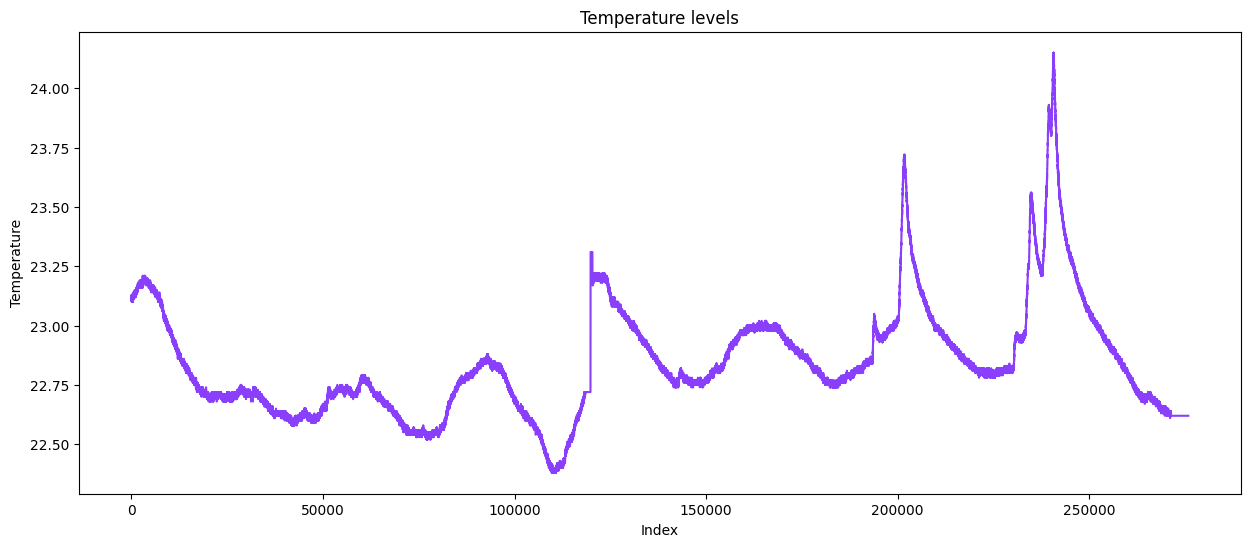

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['temperature'], label='Temperature', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature levels')
plt.show()

EDA on Temperature Vs All Other Columns

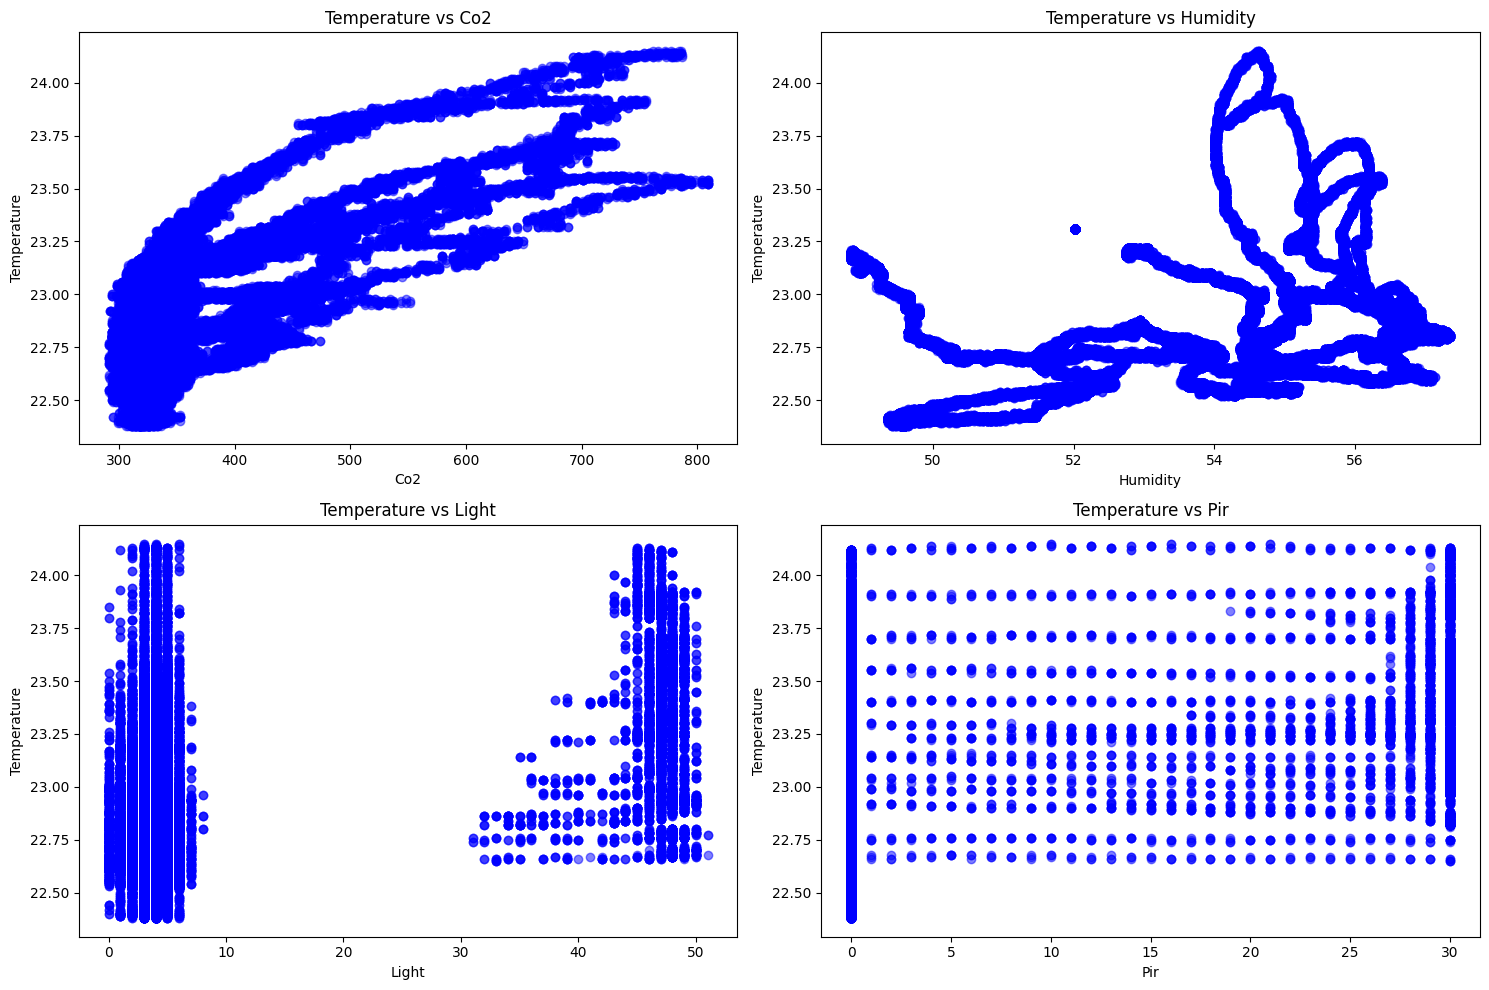

In [27]:
# Columns to plot temperature against
columns_to_plot = ['co2', 'humidity', 'light', 'pir']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Iterate through columns and plot temperature against each column
for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.scatter(data[column], data['temperature'], color='blue', alpha=0.5)
    ax.set_xlabel(column.capitalize())  
    ax.set_ylabel('Temperature')
    ax.set_title(f'Temperature vs {column.capitalize()}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

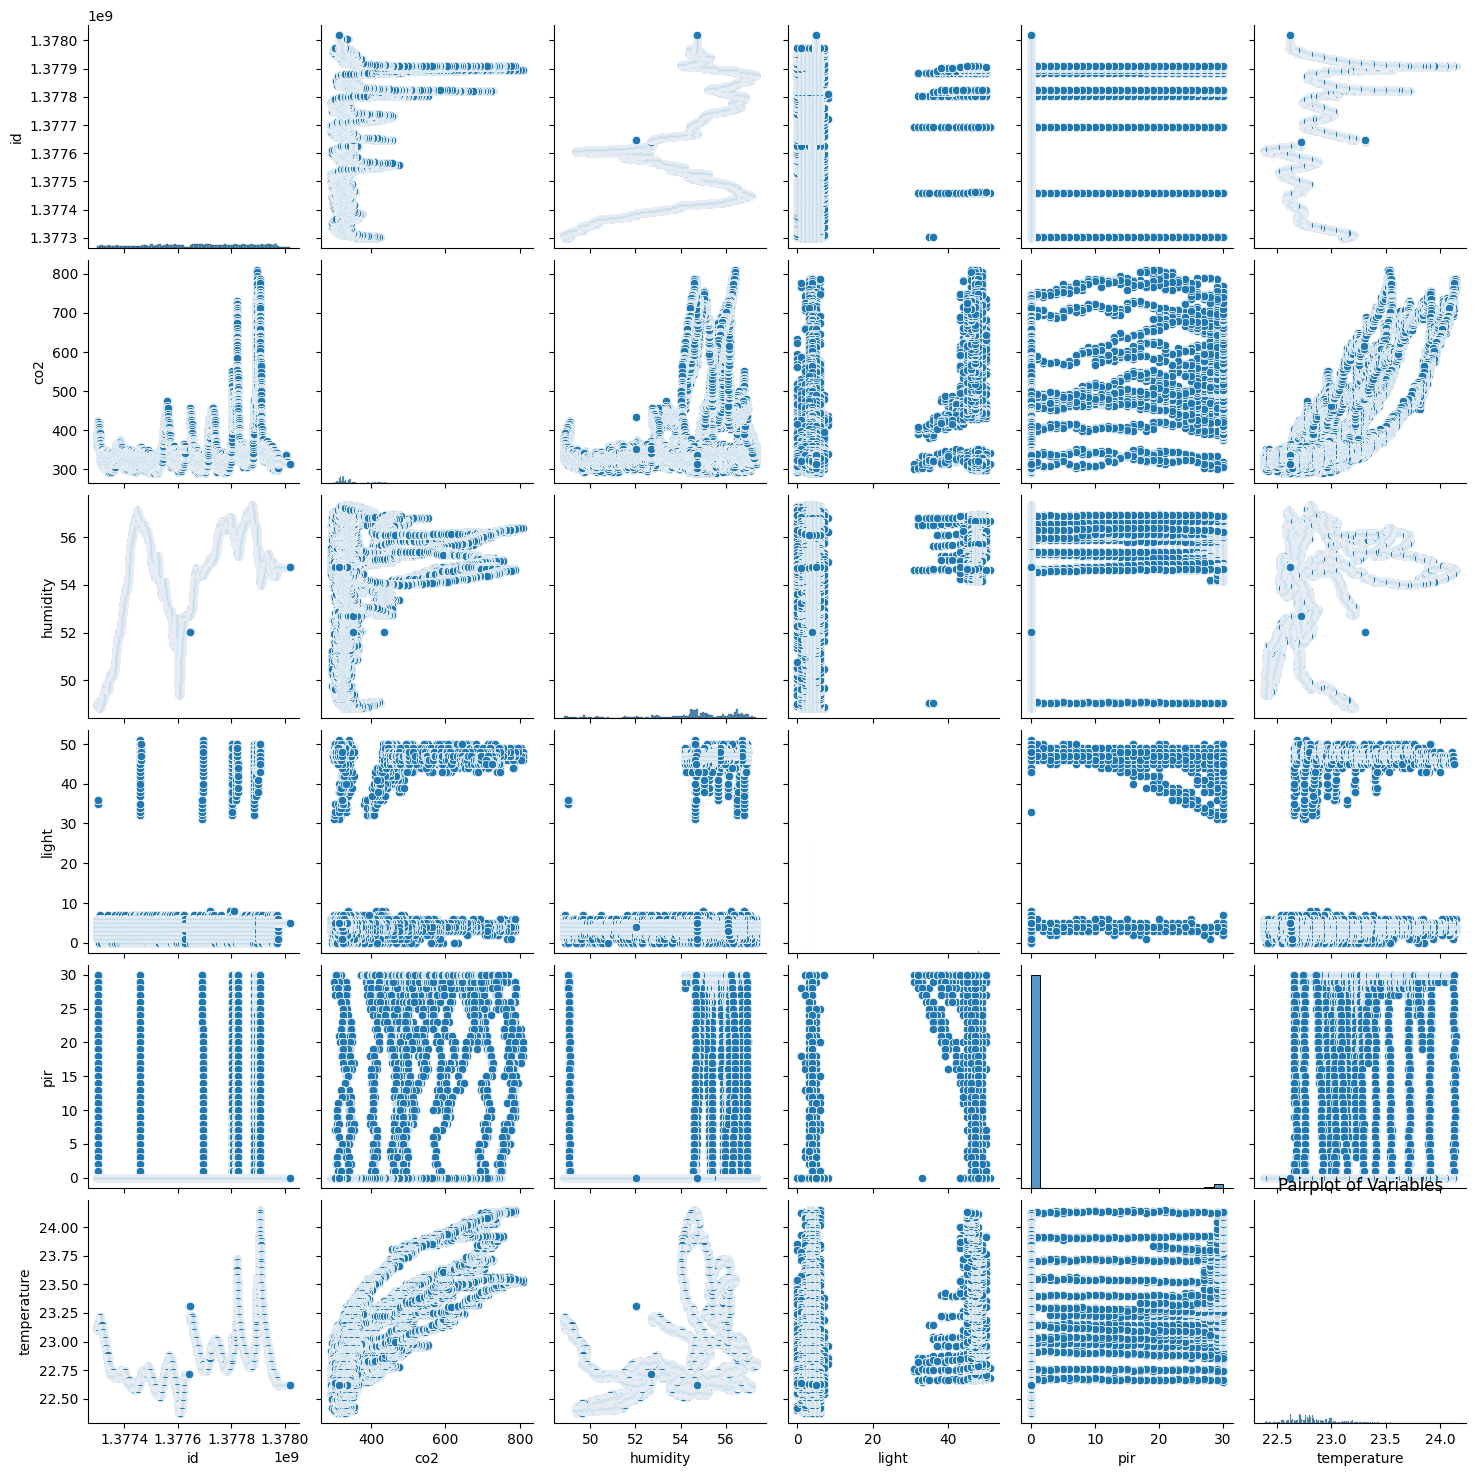

In [28]:
# Scatterplot Matrix
sns.pairplot(data)
plt.title('Pairplot of Variables')
plt.show()

<Figure size 1000x800 with 0 Axes>

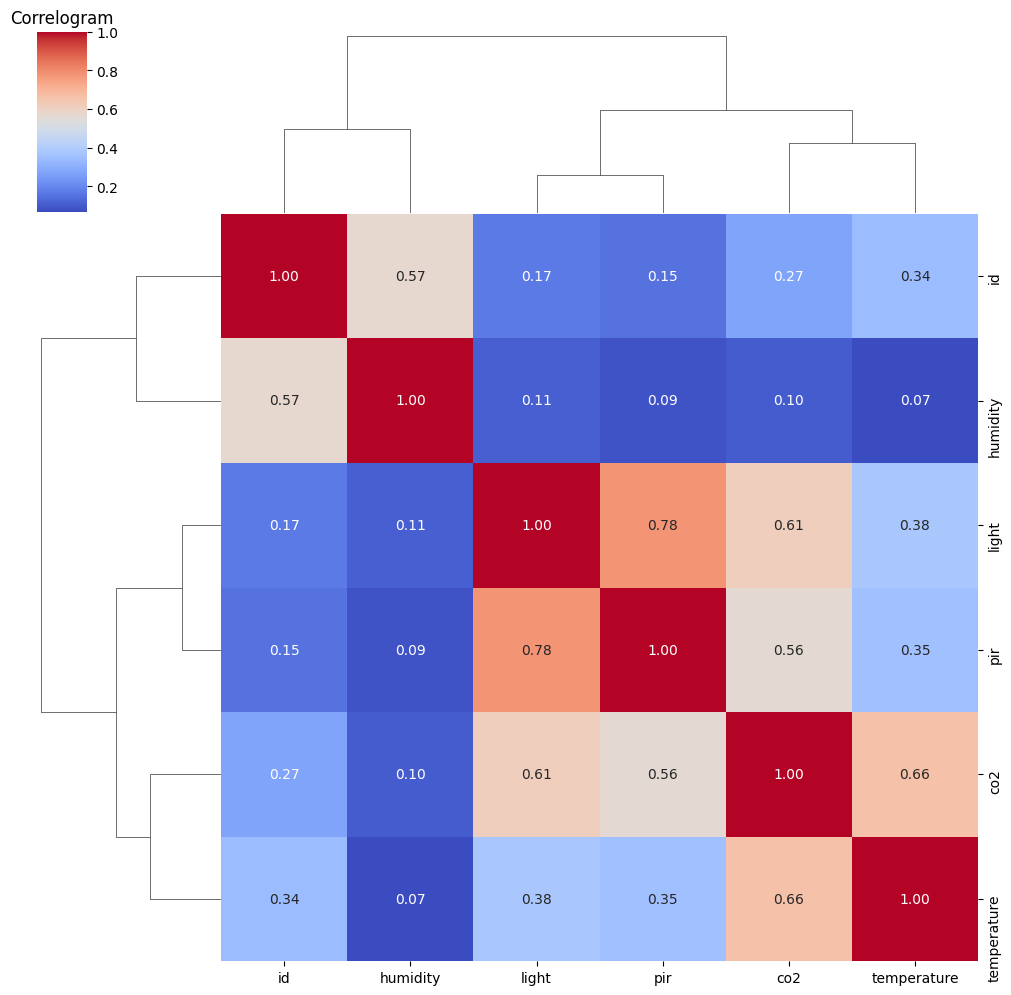

In [29]:
# Correlogram
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlogram')
plt.show()

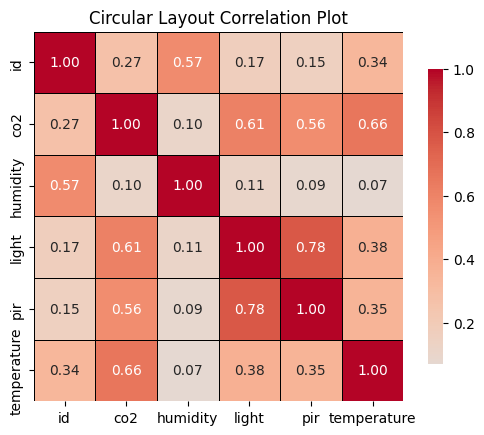

In [30]:
# Circular Layout Correlation Plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0, linewidths=0.5,
            linecolor='black', square=True, cbar_kws={"shrink": .8}, mask=False)
plt.title('Circular Layout Correlation Plot')
plt.show()

In [31]:
# Select columns of interest
columns_of_interest = ["co2", "humidity", "light", "pir", "temperature"]

Histograms of all the columns in 1 frame 

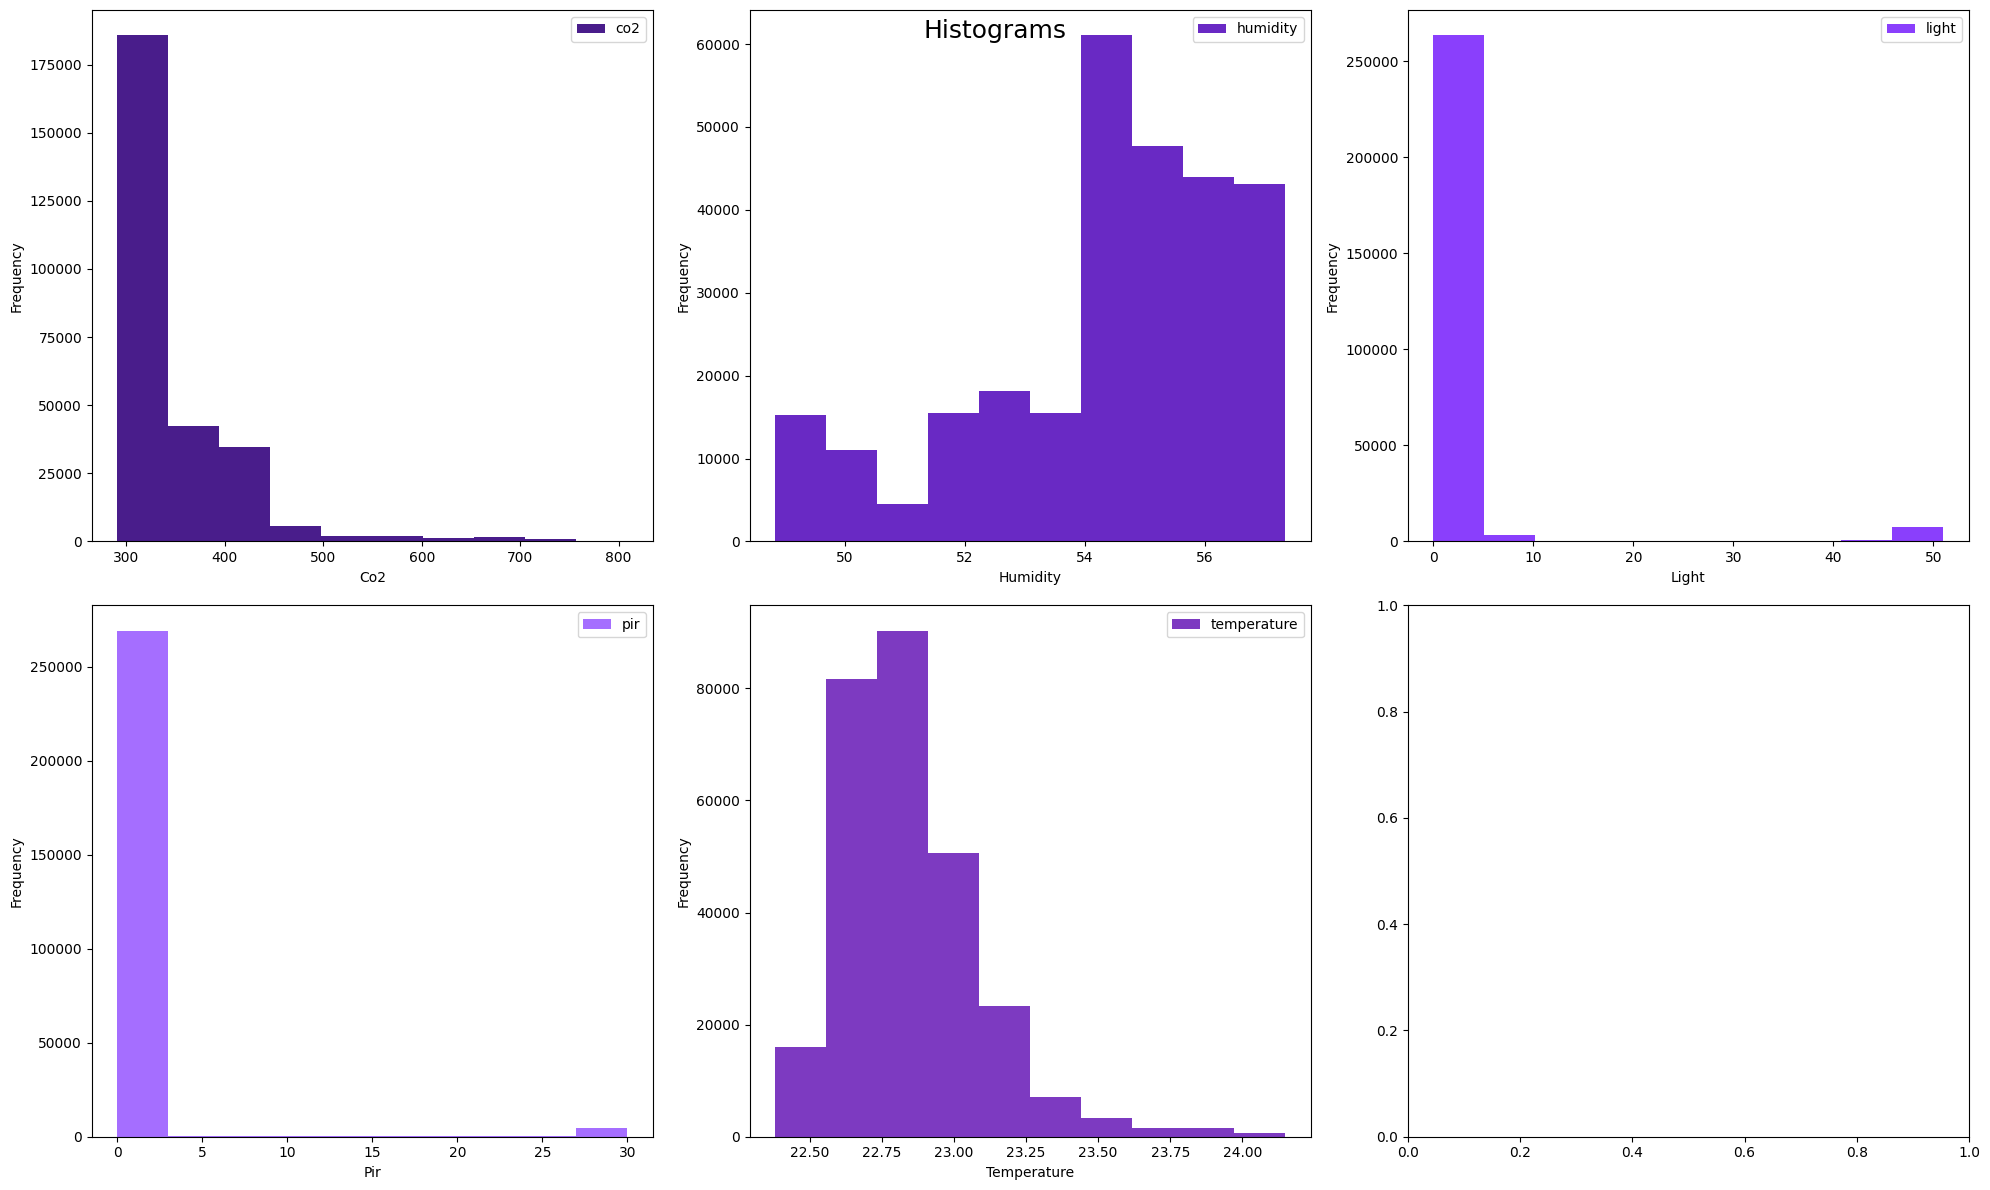

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#7D3AC1']

for index, column in enumerate(columns_of_interest):
    ax = axes.flatten()[index]
    ax.hist(data[column], color=colors[index], label=column, bins=10) 
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Frequency')
    ax.legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.suptitle('Histograms', size=18)

# Show the plot
plt.show()

Running Basic Machine Learnong Algorithms on the Dataset

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline


In [34]:
X = data[['co2', 'humidity', 'light', 'pir']]  # Features
y = data['temperature']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [36]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_regression, k=10)  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Linear Regression with Feature Scaling, Feature Selection, and Polynomial Features
linear_regression_model = make_pipeline(
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=10),  # Adjust k as needed
    PolynomialFeatures(degree=2),  # You can adjust the degree as needed
    LinearRegression()
)

linear_regression_model.fit(X_train, y_train)
y_pred_lr = linear_regression_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression with Feature Scaling, Feature Selection, and Polynomial Features:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("R-squared:", r2_lr)

Linear Regression with Feature Scaling, Feature Selection, and Polynomial Features:
Mean Squared Error: 0.029261096094869734
Mean Absolute Error: 0.1329440464741874
R-squared: 0.49397520741366074


In [37]:
# Linear Regression with Polynomial Features
linear_regression_model_poly = LinearRegression()
linear_regression_model_poly.fit(X_train_poly, y_train)
y_pred_lr_poly = linear_regression_model_poly.predict(X_test_poly)
mse_lr_poly = mean_squared_error(y_test, y_pred_lr_poly)
mae_lr_poly = mean_absolute_error(y_test, y_pred_lr_poly)
r2_lr_poly = r2_score(y_test, y_pred_lr_poly)

print("Linear Regression with Polynomial Features:")
print("Mean Squared Error:", mse_lr_poly)
print("Mean Absolute Error:", mae_lr_poly)
print("R-squared:", r2_lr_poly)

Linear Regression with Polynomial Features:
Mean Squared Error: 0.029261096094869734
Mean Absolute Error: 0.1329440464741874
R-squared: 0.49397520741366074


In [38]:
# Decision Tree with specific parameters
decision_tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("R-squared:", r2_dt)


Decision Tree:
Mean Squared Error: 0.021474248568743807
Mean Absolute Error: 0.10955095469095691
R-squared: 0.6286365301315124


In [39]:
# Random Forest with specific parameters
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)


Random Forest:
Mean Squared Error: 0.020936619778942095
Mean Absolute Error: 0.10836878038613484
R-squared: 0.6379339773619855


In [40]:
# K-Nearest Neighbors with specific parameters
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors:")
print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:", mae_knn)
print("R-squared:", r2_knn)


K-Nearest Neighbors:
Mean Squared Error: 0.012808353909166693
Mean Absolute Error: 0.06936141215701909
R-squared: 0.7784995951879308


In [41]:
from sklearn.linear_model import Ridge

# Ridge Regression with specific parameters
ridge_regression_model = Ridge(alpha=0.5)  # You can adjust the alpha parameter
ridge_regression_model.fit(X_train, y_train)
y_pred_ridge = ridge_regression_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)

Ridge Regression:
Mean Squared Error: 0.03181533219145508
Mean Absolute Error: 0.14153375906268295
R-squared: 0.4498036976793499


Deep Learning Modelss 

In [42]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
# Multilayer Perceptron (MLP) with specific parameters
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\nMultilayer Perceptron (MLP):")
print("Mean Squared Error:", mse_mlp)
print("Mean Absolute Error:", mae_mlp)
print("R-squared:", r2_mlp)


Multilayer Perceptron (MLP):
Mean Squared Error: 0.039002844293493426
Mean Absolute Error: 0.14475432323870654
R-squared: 0.32550694171184424


In [44]:
# Gradient Boosting Regressor with specific parameters
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, loss='squared_error')
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)
print("R-squared:", r2_gb)


Gradient Boosting Regressor:
Mean Squared Error: 0.011710923569218278
Mean Absolute Error: 0.07562418125201753
R-squared: 0.7974779327850557


In [45]:
# Collecting evaluation metrics of all models into a dictionary
pd.set_option('display.width', 1000)
results_dict = {
    "Linear Regression": [mse_lr, mae_lr, r2_lr],
    "Decision Tree": [mse_dt, mae_dt, r2_dt],
    "Random Forest": [mse_rf, mae_rf, r2_rf],
    "K-Nearest Neighbors": [mse_knn, mae_knn, r2_knn],
    "Multilayer Perceptron (MLP)": [mse_mlp, mae_mlp, r2_mlp],
    "Gradient Boosting Regressor": [mse_gb, mae_gb, r2_gb]
}

# Convert the dictionary into a DataFrame
results_data = pd.DataFrame(results_dict, index=['Mean Squared Error', 'Mean Absolute Error', 'R-squared'])

# Transpose the DataFrame for better readability
results_data = results_data.T

print("Model Comparison:")
print(results_data)

Model Comparison:
                             Mean Squared Error  Mean Absolute Error  R-squared
Linear Regression                      0.029261             0.132944   0.493975
Decision Tree                          0.021474             0.109551   0.628637
Random Forest                          0.020937             0.108369   0.637934
K-Nearest Neighbors                    0.012808             0.069361   0.778500
Multilayer Perceptron (MLP)            0.039003             0.144754   0.325507
Gradient Boosting Regressor            0.011711             0.075624   0.797478
